# Jegyzőkönyv 3 számolások

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import schemdraw
from schemdraw import logic
from schemdraw.parsing import logicparse
from sympy import symbols, Not, Or, And
from sympy.logic.boolalg import simplify_logic

C:\Users\Kornel\AppData\Local\Temp\ipykernel_24120\652453753.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. feladat: 2 bites komparátor

Áramkör teljesen megtervezve, bemutatni csak az egyenlőség részt kell.

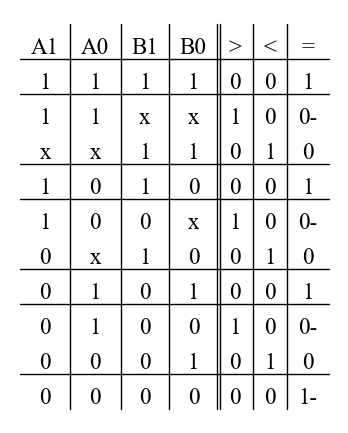

In [3]:
a1, a0, b1, b0 = symbols('a1,a0,b1,b0')

truth_table = """
A1|A0|B1|B0| >| <| =
---------------------
1 | 1| 1| 1| 0| 0| 1
---------------------
1 | 1| x| x| 1| 0| 0-
x | x| 1| 1| 0| 1| 0
---------------------
1 | 0| 1| 0| 0| 0| 1
---------------------
1 | 0| 0| x| 1| 0| 0-
0 | x| 1| 0| 0| 1| 0
---------------------
0 | 1| 0| 1| 0| 0| 1
---------------------
0 | 1| 0| 0| 1| 0| 0-
0 | 0| 0| 1| 0| 1| 0
---------------------
0 | 0| 0| 0| 0| 0| 1-
"""

logic.Table(truth_table, colfmt='c|c|c|c||c|c|c', fontsize=18, font="times new roman")

### `=` kimenet logikai egyszerűsítés

= minterm:
(a0 & a1 & b0 & b1) | (a0 & ~a1 & ~b1) | (a1 & b1 & ~a0 & ~b0) | (~a0 & ~a1 & ~b0 & ~b1)
Simplified:
(a0 | ~b0) & (a1 | ~b1) & (b1 | ~a1) & (b0 | ~a0 | ~b1)


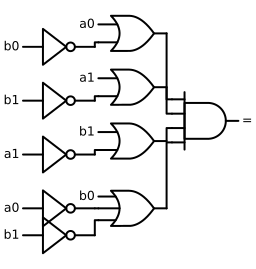

In [4]:
equivalence_equation = (a1 & a0 & b1 & b0) \
    | (~a1 & a0 & ~b1) \
    | (a1 & ~a0 & b1 & ~b0) \
    | (~a1 & ~a0 & ~b1 & ~b0)

print("= minterm:")
print(equivalence_equation)

simplified_equivalence = simplify_logic(equivalence_equation)
print("Simplified:")
print(simplified_equivalence)
logicparse(str(simplified_equivalence), outlabel="=")

### `>` kimenet logikai egyszerűsítés

> minterm:
(a1 & ~a0 & ~b1) | (a0 & a1 & ~(b0 & b1)) | (a0 & ~a1 & ~b0 & ~b1)
> simplified:
(a0 | a1) & (a0 | ~b1) & (a1 | ~b0) & (a1 | ~b1) & (~b0 | ~b1)


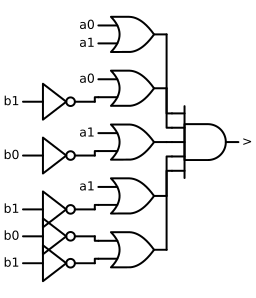

In [5]:
bigger_equation = (a1 & a0 & ~(b1 & b0)) \
    | (a1 & ~a0 & ~b1) \
    | (~a1 & a0 & ~b1 & ~b0)

print("> minterm:")
print(bigger_equation)

simplified_bigger = simplify_logic(bigger_equation)
print("> simplified:")
print(simplified_bigger)
logicparse(str(simplified_bigger), outlabel=">")

### `<` kimenet logikai egyszerűsítés

< minterm:
(b1 & ~a1 & ~b0) | (b0 & b1 & ~(a0 & a1)) | (b0 & ~a0 & ~a1 & ~b1)
< simplified:
(b0 | b1) & (b0 | ~a1) & (b1 | ~a0) & (b1 | ~a1) & (~a0 | ~a1)


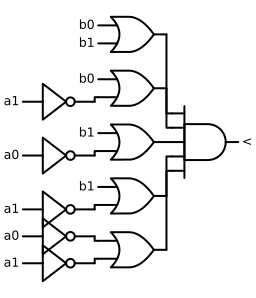

In [6]:
bigger_equation = (b1 & b0 & ~(a1 & a0)) \
    | (b1 & ~b0 & ~a1) \
    | (~b1 & b0 & ~a1 & ~a0)

print("< minterm:")
print(bigger_equation)

simplified_bigger = simplify_logic(bigger_equation)
print("< simplified:")
print(simplified_bigger)
logicparse(str(simplified_bigger), outlabel="<")

### Áramkör

[![Áramkör](./jegyzokonyv03/feladat1.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgpABZsKBTAWjDACgAZEJwm8Gvjz7FCUMQDMAhgBsAzg2qROIbCn59VIEWKpS5CpEq5UwAsdqq6Z8xcqabTgzRYnWDUNgA9uGUXkE05HjkfCh8AILs3kxmBNxgSHhIoRFK0WBqePRgQaIpIABCUSBoIP60xGUhJXwFSglqOaJgxGpoeOCtYmpICGwJVCh4HS1qqiZdVHy9bACS6iX44L6LHZbQMwCyKoQjZti7WqKDG2zbNHALF1QuKKfnDmZ0aren3gcQWCoYiVM1IAAdACOXloKHoXzoQT+YRAAB5QdgupDIH4YXwAHxzBaYRorXE6DYUfoIPGiFAIclLCnHErUPrzRwqA7LUTYFnrGYNVkqUrtXmWOkzRlPS5NWiXTnE7ni7DlflyviDelsADuPPF9jJHnVWp5eqZSnVjw0bSWRt5qxx5rVVtGJVh9otKEdhEGjsmtpdfDAbpKw3AfudFx5QxGK2Dg0pVppOpK0f5sfGcaTfKWyedGDasIJipTWZU8thecz2dCAe9cfFYSoQhqlltdZr3F4CwtJjMgwL7ZKBaZBItmgVY0gSttmlwPpWk7jBpWevZx0bE5ZTMXca7aioBzWtu3h1lhwtTZDdeus9b56Z58j8fJIfFzoT1IrNplKwEHX5n+6Yj66vFZ4Wz4IDj0vTQz0lZcxhZPUaFbY9NHgqc8gQklBgDSlt1KLC-z-ccDy6ZMnQIkYiIPTsvUwoZex6GjSwoGiCR-Bif2-Ghd3VSs8wVcp6lJHkEAyK0hK3IViRFaYaPFUk1igIkGQWBAuhkyZ5K5ASZPxJYEAjcTFKZQho3FIzaRgDTtV4QYlis39hQWLMTBWRzCQsnkMFHK0PKVfTsUMgMTIDKU+m8UoaC6cKKmSf46lBFg1HCiAcgqECYuKGIQOIWsEgqeh8nCNIfDyLoYhCYhothSJoNoVs4IsarwuaD96uNEdTUYziROE2NRJTaNep6yiuP6swwwoIbgIoP0ZKDcc6I6TRlK3OaKBUswlo3HY5NkzadqZHawOmP0z00Q6ptrVtCFhM6rpQkBbt2+j7ujHtTIWN7nR0-EQ10pcuJ+76qFw29cLG4GvRskNY1sp9RFsnqIy9fr8UwxGuKWbzaJATGGMxgkNoYjawc9dUqA++6gr3Cm9j4XZOsWoi1BcwcmdKJlmdtK9RSB2b1XPXDk3BvmTVoTRhgbYXMjwbCqHF-MXm6gNiGEhiwEgHMC2V5b0ZGdXQj7PW+r8bQxrwFq7yOKNjb+q0RCty2UxDOXTelx3ZZNp3Xc+jozfvd2bdjPBW1NtDhr8IdoyDscdbKCPw+WyTkCWcU1fNdTpU0lY1ZzZPDeVeymTVh8s9HQVzIz7U7dtoNfMTsgmtEevXIrnlfatNv84khYtZ5Hvgr82IONbof+-feP29O3yuILXwvwxo8vQLfwvxnheuIDZesc3-iMJ913kzloH8LH7HDn5WffyBuKMA6DB4O4SK78qfL0vvu-BGSu-qkqwqWD4O+kA5Tvh0fIRRQRgFvvfQI2NIqgJZtjUomgfja0tMg9yAkLTihvj5bBm1cFk0pq1bGAkxa+jjKQhuZQyE3VhHWbejZWybyZPQ0m2M+JlC9lTOW4pD62iZD3OsfcGHCGEnQkeXCvZaAmjcMw4piATX4fOZwaNuDKNEHVG2gjRGtiLhLSauiFgGMQi8JRjQ4CdQNOYwxVilBAA)

## 2. feladat: Digitális kulcs lakat

Egy 4 bites kulcsot ellenőrzünk le, hogy a nálunk tárolt 4 bites kulccsal eggyezik-e.

### Áramkör

[![Áramkör](./jegyzokonyv03/feladat2.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgpABZsKBTAWjDACgAZEJwm8Gvjz7FCUMQDMAhgBsAzg2qROIbCn59VIEWIhS5CpEq5UwAsdpMg98xcqabTgzRYkybhtgA9uGUXkE05HjkfCh8ANLYXtxmBNxgSHhIoREo0SxqePRgQaIpIOHs3mgg-rTEpSEgYQVKALIqhHjqjc0uKNAIbA00YKKOtH1aolQdXd7YhBBYKjN4VPkAotE0kNMh2IkL1XwA8uHRKGCZKRDBtDsgAMpK3mDzpfRoFXh5l1dF-M1xOUHJ72k7kMyqZElUalcolw+iYzDDhmIqNYDFBlGBiGoBui1C4kW4UUZqjUBigarirPjbNCUM0sTSEVQ8fpbAkFs1VGyVAg1NsqF0AO6lUZ4b5UXB8JSCh7ikC8FSQCVsQVymUqkqSoUqEoDDmowU67VmGnNDVDY3gUQy02WhVa+WKwWaGVO9VKi1aqhMGjs12Cr0+z3e6oivXcOUDIQ7Rlu460uH0tAmmMJ-DcTSJ0P2NQZrNRzMOMy57H5zEYnRljUmCt5ystEy+UP10ThhsalvNlLRx2YsxBgamhPEhOrUPwrGEKs8mMT8BlhwVt3ztTpkca7RhKjaHIjN1bhvF7ejsuHg9ma2jEfwjPn6qp0mhVMa++35rP-tuoOTdlNVqh3qWn9-zrNgAElf02Zcf11RlOgoRcoIQ9luVDL9fyA1CNVQlAEAAuNFQSPgSUvI0MB5apqC6AjNQ3ajSLENQkEohBCNEGizTo0YxCYgJXxHf1qg48i+VAlpMB7UIQxgxiRIeMTqMkqBYK6MD2MxViFJgaSwP4uSdI0pSP2-ZpP2QgdXxqINnw1SyLLw1FvAQegskeUo3hqcIAB0AAdohDEFjkqC53KYN05SoOULF3fpRG0SLWS5ZcSgg4MTSEuDHUmD0VEy7BMswnKcttXKd0dIrCtCHCUNtbDLUymqULqyrivdJQACVspGFQykZMQR0MRFOkXPLZQlUMt1q6KUOQ81kvqzDpqan85qihEt3pNthA7cB1rYWQRu2tp+nW8AKX0NggA)

## 3. feladat: Hővészjelző

Egy két bites csatornán érkező kódot kell dekódolni négy csatornára. Az a csatorna lesz hamis értékű, amelyik ki van választva

### Specifikáció

**Adatlap szerinti B érték**: `3950K`
[Hőváltozás adatlap](https://www.gotronic.fr/pj2-mf52type-1554.pdf)

Midpoint: 27.5, approximate resistance: 9024.0


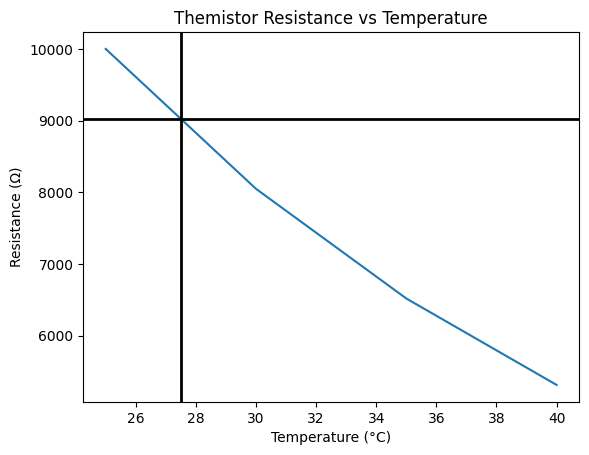

In [34]:
temp = [25,
        30,
        35,
        40]
resistance = [10.00 * 10**3,
              8.048 * 10**3,
              6.518 * 10**3,
              5.312 * 10**3]

plt.plot(temp, resistance, '-')

plt.xlabel('Temperature (°C)')
plt.ylabel('Resistance (Ω)')
plt.title('Themistor Resistance vs Temperature')

plt.axvline((temp[0] + temp[1]) / 2, color='black', lw=2)
plt.axhline((resistance[0] + resistance[1]) / 2, color='black', lw=2)
plt.yticks()
print(f"Midpoint: {((temp[0] + temp[1]) / 2)}, approximate resistance: {((resistance[0] + resistance[1]) / 2)}")


### Megoldás módja

Látható, hogy körülbelül 9000K ellenállás értéket vesz fel egy emberi kéz hőméréklete körül. 

Tehát ha csinálunk egy referencie 9000K ellenállású ágat, ahol azonos feszültséget küldünk át, mint a
themistoron, és összehasonlítjük az `LM339` chippel, akkor kisebb hőmérsékleten a themistor ága nagyobb lesz
ellenkező esetben kisebb.

### Áramkör

[![Áramkör](./jegyzokonyv03/feladat3.svg)](https://falstad.com/circuit/circuitjs.html?ctz=CQAgLCAMB0l3BWEBGGAmOaDsWDMkAONANgE5SsQFIrxcqBTAWmWQCgAPcNZFC8LLww0IaCAAkA8gBU2uaiFxoQGAimI1VUFPBryCa5EjBIYCcrsvxe0hgFsADgwBOAQwAuAV2cM2zxcrIGuo0QTQ0pPBsAEoBKoTaWuHgNKbaZjFxYdrZyWCp6VDQCH4hKmJl2MrhsOz+2aTEZchgEDWQ7ADuzcHZLW1srs2kylV8ymppqJZFlgjz82CkuERYaGiRajCWWJDEBMgkBGBYYLhBCBDTumzd2Vr3FZC3zVhNfcHP3WPIIwGhfy+KjW42BoyeLzG61EBnKAwAkipYdD-nD0sUqC8lJoKvJwQNutjQXjQc8ALKKBD4lI4toqYpsCkk37KfIA6r0kpcMA8FTncAEShoXAQUQQADCkgAMgARNgAc0qIPusPCCpQaDUjQ1hkO6ReDXempA2ueQA)